In [1]:
import yfinance as yf
import pandas as pd
from datetime import date, timedelta
import datetime
from datetime import datetime
import seaborn as sns
import statistics

import matplotlib as plt

plt.rcParams["figure.figsize"] = (20, 10)
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
backward_window = 365
forward_window = 30

DURING COVID

In [3]:
df = yf.download("MRF.NS", start="2020-01-01", end="2023-12-31")

[*********************100%%**********************]  1 of 1 completed


c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,66199.000000,66944.000000,66100.000000,66709.046875,66312.281250,4235
2020-01-02,66709.046875,67715.953125,66266.000000,67302.546875,66902.265625,6603
2020-01-03,67400.000000,67466.648438,66250.000000,66583.453125,66187.445312,5527
2020-01-06,66012.296875,66176.898438,65120.148438,65508.949219,65119.324219,10446
2020-01-07,65749.000000,66515.046875,65100.000000,65334.101562,64945.511719,10835


In [5]:
def backtest(df):
    results = []
    for i in range(0, len(df) - backward_window - forward_window):
        d1 = df.index[i]
        d2 = d1 + timedelta(days=backward_window)
        d3 = d2 + timedelta(days=forward_window)

        dfp = df.loc[d1:d2]
        dfp2 = df.loc[d2:d3]
        selection_return = (dfp["Close"].iloc[-1] - dfp["Close"].iloc[0]) / dfp["Close"].iloc[0]
        holding_return = (dfp2["Close"].iloc[-1] - dfp2["Close"].iloc[0]) / dfp2["Close"].iloc[0]
        momentum_return = holding_return if selection_return > 0 else 0
        results.append((d2, holding_return, momentum_return))
    return pd.DataFrame(results, columns=["Date", "HOLD", "MOMENTUM"]).set_index("Date")

In [23]:
final = backtest(df)
final

,HOLD,MOMENTUM
Date,,
2015-01-01,0.054120,0.054120
2015-01-02,0.048299,0.048299
2015-01-03,0.045246,0.045246
2015-01-06,0.060574,0.060574
2015-01-07,0.038960,0.038960
...,...,...
2023-05-20,0.040107,0.040107
2023-05-23,0.045878,0.045878
2023-05-24,0.040273,0.040273


In [7]:
cumulative_returns = (1 + final).cumprod()

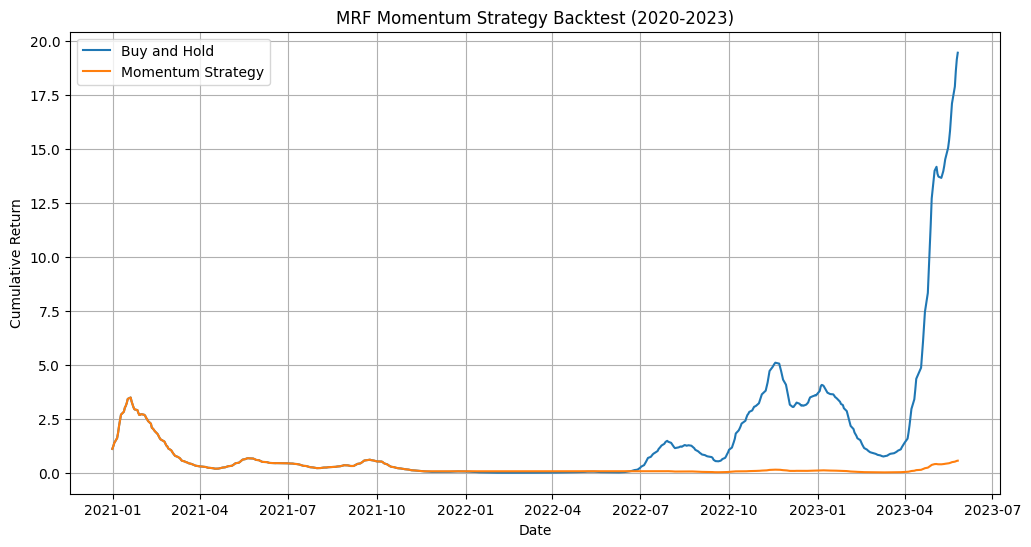

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns.index, cumulative_returns["HOLD"], label="Buy and Hold")
plt.plot(cumulative_returns.index, cumulative_returns["MOMENTUM"], label="Momentum Strategy")
plt.title("MRF Momentum Strategy Backtest (2020-2023)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
def calculate_metrics(returns):
    total_return = (1+returns).prod()-1
    annual_return = (1+total_return)**(252/len(returns))-1
    sharpe_ratio = np.sqrt(252) * returns.mean() / returns.std()

    return {"Total Return": total_return, "Annual Return": annual_return, "Sharpe Ratio": sharpe_ratio}

In [10]:
hold_metrics = calculate_metrics(final["HOLD"])
momentum_metrics = calculate_metrics(final["MOMENTUM"])

metrics_df = pd.DataFrame([hold_metrics, momentum_metrics], index=["HOLD", "MOMENTUM"])
metrics_df

,Total Return,Annual Return,Sharpe Ratio
HOLD,18.435298,2.498871,1.713750
MOMENTUM,-0.436369,-0.214959,0.041002


10 YEAR BACKTESTING

In [11]:
df = yf.download("MRF.NS", start="2014-01-01", end="2023-12-31")

[*********************100%%**********************]  1 of 1 completed


c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\yfinance\utils.py:771: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [12]:
final = backtest(df)

In [21]:
cumulative_returns = (1 + final).cumprod()
cumulative_returns

,HOLD,MOMENTUM
Date,,
2015-01-01,1.054120e+00,1.054120
2015-01-02,1.105033e+00,1.105033
2015-01-03,1.155031e+00,1.155031
2015-01-06,1.224996e+00,1.224996
2015-01-07,1.272721e+00,1.272721
...,...,...
2023-05-20,2.686046e+08,111.071129
2023-05-23,2.809277e+08,116.166877
2023-05-24,2.922416e+08,120.845300


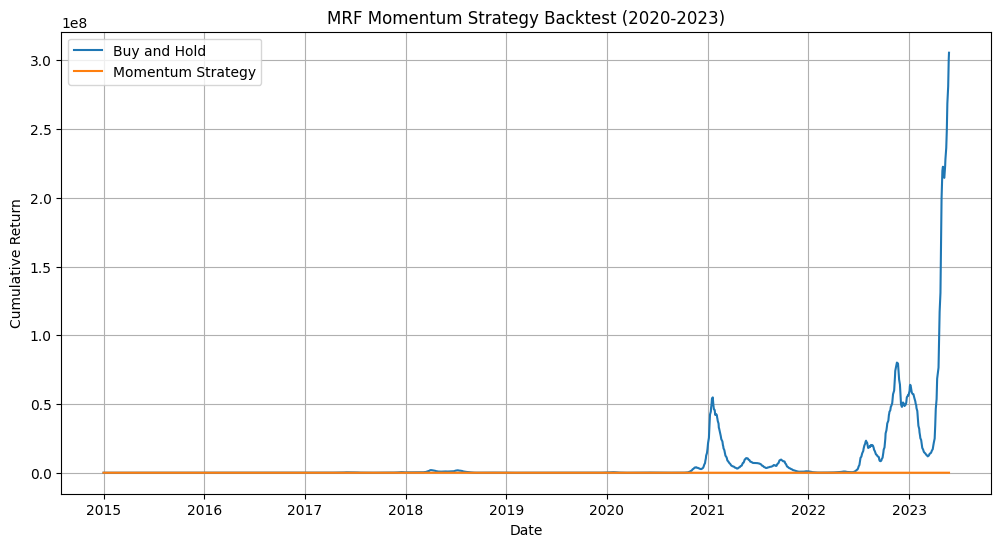

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns.index, cumulative_returns["HOLD"], label="Buy and Hold")
plt.plot(
    cumulative_returns.index, cumulative_returns["MOMENTUM"], label="Momentum Strategy"
)
plt.title("MRF Momentum Strategy Backtest (2020-2023)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
hold_metrics = calculate_metrics(final["HOLD"])
momentum_metrics = calculate_metrics(final["MOMENTUM"])

metrics_df = pd.DataFrame([hold_metrics, momentum_metrics], index=["HOLD", "MOMENTUM"])
metrics_df

,Total Return,Annual Return,Sharpe Ratio
HOLD,3.055396e+08,9.788591,2.529207
MOMENTUM,1.253442e+02,0.802360,1.075771


In [26]:
import quantstats as qs
from IPython.display import display, HTML

In [28]:
report = qs.reports.html(final)
report_path = r"C:\Users\asus\Downloads\quantstats-tearsheet.html"
with open(report_path, 'r') as file:
        html_content = file.read()
    
    # Display the HTML report in the notebook
display(HTML(html_content))

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old